<a href="https://colab.research.google.com/github/AhmadMuhamed/Data_Science/blob/main/Loan_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df.loc[(df['int.rate']==0.1357	) &(df['purpose']=='debt_consolidation')]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3388,1,debt_consolidation,0.1357,679.37,11.492723,7.80,702,7746.000000,24918,29.7,1,0,0,0
4202,1,debt_consolidation,0.1357,407.63,11.264464,23.72,682,4649.958333,28843,84.8,1,0,0,0
4213,1,debt_consolidation,0.1357,366.86,10.915088,19.85,702,3030.000000,12207,70.6,1,0,0,0
4218,1,debt_consolidation,0.1357,407.63,10.858999,15.48,682,3929.958333,8718,45.6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9376,0,debt_consolidation,0.1357,679.37,11.512925,14.60,707,5790.000000,23794,62.4,4,0,0,0
9477,0,debt_consolidation,0.1357,254.77,10.532096,13.02,687,2130.000000,9451,33.3,4,0,0,1
9482,0,debt_consolidation,0.1357,339.69,10.373491,22.95,687,3150.041667,10624,62.9,4,0,0,0
9487,0,debt_consolidation,0.1357,823.74,12.206073,14.30,722,5371.041667,155946,90.1,0,0,0,1


In [ ]:
df1=df[['installment','int.rate','log.annual.inc']]
df1

,installment,int.rate,log.annual.inc
0,829.10,0.1189,11.350407
1,228.22,0.1071,11.082143
2,366.86,0.1357,10.373491
3,162.34,0.1008,11.350407
4,102.92,0.1426,11.299732
...,...,...,...
9573,344.76,0.1461,12.180755
9574,257.70,0.1253,11.141862
9575,97.81,0.1071,10.596635
9576,351.58,0.1600,10.819778


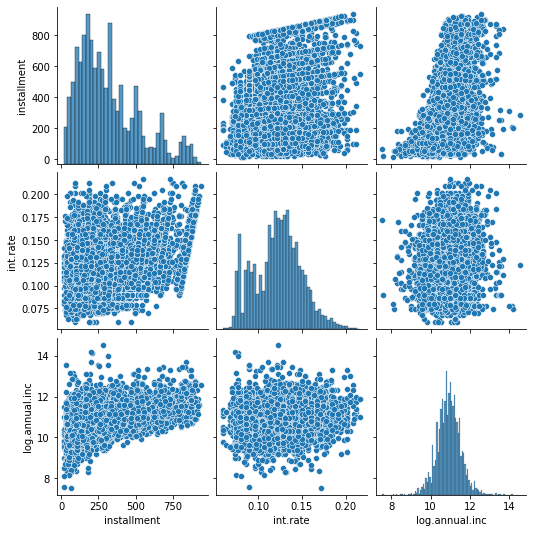

In [ ]:
sns.pairplot(df1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df[['int.rate','installment', 'log.annual.inc',	'dti',	'fico',	'days.with.cr.line',	'revol.bal',	'revol.util',	'inq.last.6mths' ,'delinq.2yrs'	,'pub.rec']]
y = df[['not.fully.paid']]
y

,not.fully.paid
0,0
1,0
2,0
3,0
4,0
...,...
9573,1
9574,1
9575,1
9576,1


In [ ]:
x

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [ ]:
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)


In [ ]:
y_train

,not.fully.paid
2622,0
4649,0
2789,0
5790,1
2394,0
...,...
4587,0
6646,0
5478,0
8548,0


In [ ]:
sm = SMOTE(random_state=22)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.count_nonzero(y_train == 1)

6464

In [ ]:
np.count_nonzero(y_train == 0)

6464

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report


In [ ]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.6212871287128713
Testing Accuracy: 0.6127348643006263
Testing Confusion Matrix: 
[[966 615]
 [127 208]]
Testing Recall: 0.6208955223880597
Testing Precesion: 0.25273390036452004
Testing F-1: 0.35924006908462863
Testing F-Beta: 0.2867383512544803
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8508663366336634
Testing Accuracy: 0.5960334029227558
Testing Confusion Matrix: 
[[995 586]
 [188 147]]
Testing Recall: 0.4388059701492537
Testing Precesion: 0.20054570259208732
Testing F-1: 0.2752808988764045
Testing F-Beta: 0.22497704315886136
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.7370049504950495
Testing Accuracy: 0.6440501043841336
Testing Confusion Matrix: 
[[1079  502]
 [ 180  155]]
Testing Recall: 0.4626865671641791
Testing Precesion: 0.2359208523592085
Testing F-1: 0.3125
Testing F-Beta: 0.2615592305096186
------------------------------
Training Mod

In [ ]:
model = XGBClassifier()

model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model = SVC(kernel='poly')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[717 864]
 [ 89 246]]
0.5026096033402923
              precision    recall  f1-score   support

           0       0.89      0.45      0.60      1581
           1       0.22      0.73      0.34       335

    accuracy                           0.50      1916
   macro avg       0.56      0.59      0.47      1916
weighted avg       0.77      0.50      0.56      1916



In [ ]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[892 689]
 [112 223]]
0.5819415448851775
              precision    recall  f1-score   support

           0       0.89      0.56      0.69      1581
           1       0.24      0.67      0.36       335

    accuracy                           0.58      1916
   macro avg       0.57      0.61      0.52      1916
weighted avg       0.78      0.58      0.63      1916



In [ ]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1079  502]
 [ 180  155]]
0.6440501043841336
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1581
           1       0.24      0.46      0.31       335

    accuracy                           0.64      1916
   macro avg       0.55      0.57      0.54      1916
weighted avg       0.75      0.64      0.68      1916



In [ ]:
model = SVC(kernel='sigmoid')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[814 767]
 [156 179]]
0.5182672233820459
              precision    recall  f1-score   support

           0       0.84      0.51      0.64      1581
           1       0.19      0.53      0.28       335

    accuracy                           0.52      1916
   macro avg       0.51      0.52      0.46      1916
weighted avg       0.73      0.52      0.58      1916



In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1278  303]
 [ 254   81]]
0.7092901878914405
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1581
           1       0.21      0.24      0.23       335

    accuracy                           0.71      1916
   macro avg       0.52      0.53      0.52      1916
weighted avg       0.73      0.71      0.72      1916



In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1483   98]
 [ 294   41]]
0.7954070981210856
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1581
           1       0.29      0.12      0.17       335

    accuracy                           0.80      1916
   macro avg       0.56      0.53      0.53      1916
weighted avg       0.74      0.80      0.76      1916

